# Lab 2.05 - Univariate Analysis


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 5 - Baseball Salaries

Het bestand Baseball Salaries bevat gegevens over 868 Major League Baseball (MLB)-spelers in het seizoen 2011. Er zijn vier variabelen: de naam van de speler, het team, de positie en het salaris. Hoe kunnen deze 868 salarissen worden samengevat?

- Bereken het gemiddelde, de mediaan en de modus (d.w.z. maatstaven voor de centrale tendens)
- Bereken het minimum, maximum en de kwartielen
- Bereken het bereik, interkwartielafstand, variantie en standaardafwijking (d.w.z. maatstaven voor variabiliteit)
- Bereken de scheefheid en kurtosis (d.w.z. maatstaven voor vorm)
- Teken een histogram. Gebruik 11 vakken met gelijke breedte. Geeft dit scheefheid aan?
- Teken een boxplot. Geeft dit scheefheid aan?

In [3]:
bb = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Baseball%20Salaries%202011.csv', delimiter=";")
# Show the first few records of the Data Frame
bb.head()

,Player,Team,Position,Salary
0,A.J. Burnett,New York Yankees,Pitcher,16500000
1,A.J. Ellis,Los Angeles Dodgers,Catcher,421000
2,A.J. Pierzynski,Chicago White Sox,Catcher,2000000
3,Aaron Cook,Colorado Rockies,Pitcher,9875000
4,Aaron Crow,Kansas City Royals,Pitcher,1400000


![a](img/Screenshot%202025-04-11%20125424.png)
![a](img/Screenshot%202025-04-11%20125435.png)

In [5]:

from scipy.stats import skew, kurtosis, mode
salaries = bb['Salary']
# Centrale tendensmaten berekenen
mean_salary = salaries.mean()  # Gemiddelde
median_salary = salaries.median()  # Mediaan

#################################################################################################################################################
## De mode is de meest voorkomende waarde in een dataset.
## In het geval van salarissen betekent dat: het salarisbedrag dat het vaakst voorkomt onder de 868 MLB-spelers.\
# .mode[0] 
# → We halen de eerste (en meestal enige) mode-waarde eruit.
# Bijvoorbeeld als dit het resultaat is: ModeResult(mode=array([500000]), count=array([14]))
# Dan is .mode[0] gewoon 500000, oftewel:
# het salaris dat het vaakst voorkomt.
#################################################################################################################################################
mode_salary = mode(salaries, keepdims=True).mode[0]


# Minimum, maximum en kwartielen berekenen
min_salary = salaries.min()
max_salary = salaries.max()
q1 = salaries.quantile(0.25)  # 1e kwartiel
q3 = salaries.quantile(0.75)  # 3e kwartiel

# Spreidingsmaten berekenen
range_salary = max_salary - min_salary  # Bereik
iqr = q3 - q1  # Interkwartielafstand
variance_salary = salaries.var()  # Variantie
std_dev_salary = salaries.std()  # Standaardafwijking

# Scheefheid en kurtosis berekenen
skewness = skew(salaries)  
kurt = kurtosis(salaries)

# Resultaten afdrukken
print(f"Gemiddelde salaris: ${mean_salary:,.2f}")
print(f"Mediaan salaris: ${median_salary:,.2f}")
print(f"Modus salaris: ${mode_salary:,.2f}")
print(f"Minimum salaris: ${min_salary:,.2f}")
print(f"Maximum salaris: ${max_salary:,.2f}")
print(f"1e kwartiel (Q1): ${q1:,.2f}")
print(f"3e kwartiel (Q3): ${q3:,.2f}")
print(f"Bereik: ${range_salary:,.2f}")
print(f"Interkwartielafstand (IQR): ${iqr:,.2f}")
print(f"Variantie: ${variance_salary:,.2f}")
print(f"Standaardafwijking: ${std_dev_salary:,.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")




Gemiddelde salaris: $3,305,054.67
Mediaan salaris: $1,175,000.00
Modus salaris: $414,000.00
Minimum salaris: $414,000.00
Maximum salaris: $32,000,000.00
1e kwartiel (Q1): $430,325.00
3e kwartiel (Q3): $4,306,250.00
Bereik: $31,586,000.00
Interkwartielafstand (IQR): $3,875,925.00
Variantie: $20,563,887,478,832.74
Standaardafwijking: $4,534,742.27
Skewness: 2.25
Kurtosis: 5.68


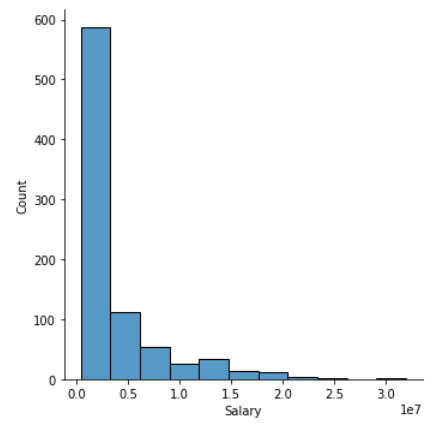

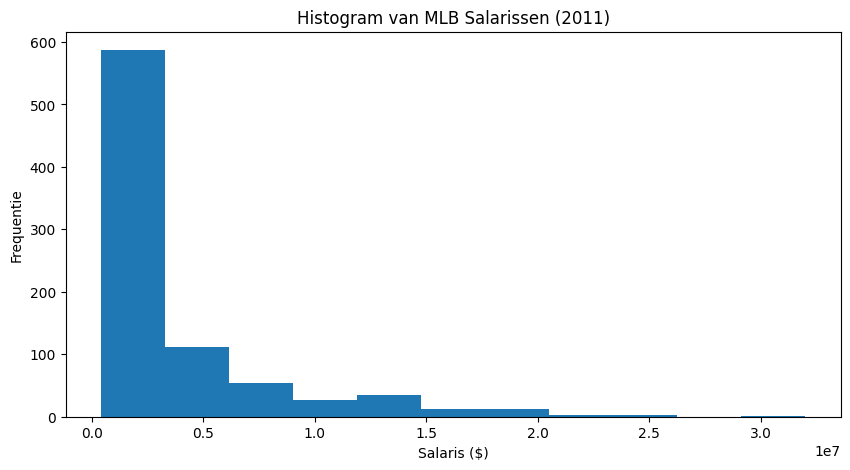

In [10]:
# Histogram tekenen
plt.figure(figsize=(10, 5))
plt.hist(salaries, bins=11)
plt.xlabel('Salaris ($)')
plt.ylabel('Frequentie')
plt.title('Histogram van MLB Salarissen (2011)')
#plt.grid(axis='x', alpha=0.7)
plt.show()


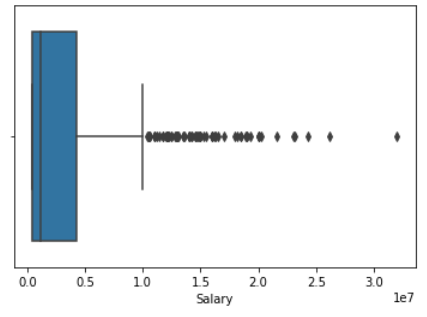

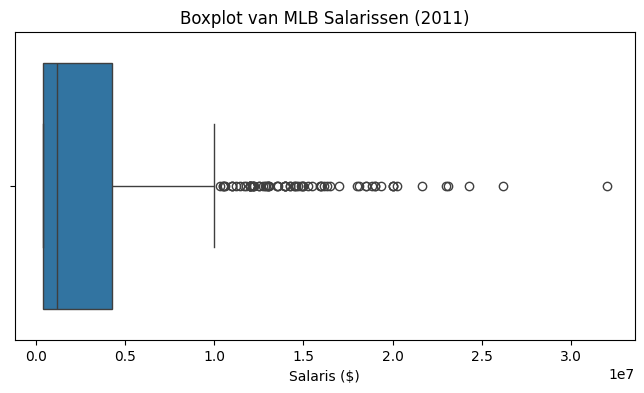

In [11]:

# Boxplot tekenen
plt.figure(figsize=(8, 4))
sns.boxplot(x=salaries)
plt.xlabel('Salaris ($)')
plt.title('Boxplot van MLB Salarissen (2011)')
plt.show()

## Answers

|      Statistic       |              Value |
| :------------------: | -----------------: |
|         Mean         |        3305054.675 |
|        Median        |          1175000.0 |
|         Mode         |        0    414000 |
|  Standard deviation  |        4534742.273 |
|       Variance       | 20563887478832.742 |
|       Skewness       |              2.257 |
|       Kurtosis       |              5.723 |
|       Minimum        |             414000 |
|        Median        |          1175000.0 |
|       Maximum        |           32000000 |
| Inter Quartile Range |          3875925.0 |
|        Range         |           31586000 |

| Percentiles  |       Value |
| :----------: | ----------: |
|     0.00     |    414000.0 |
|     0.25     |    430325.0 |
|     0.50     |   1175000.0 |
|     0.75     |   4306250.0 |
|     1.00     |  32000000.0 |
